In [1]:
from math import log
import matplotlib.pyplot as plt
import pandas as pd
import re
import numpy as np
import seaborn as sns


In [2]:
data = pd.read_csv('lyrics_entropy.csv')
data_year = pd.read_csv('lyrics_entropy_per_year.csv')

In [13]:
#checking the data
#rummy = data[data['lyrics'].str.contains(' rummy', regex=False, case=False, na=False)]

In [3]:
data['rounded_ent'] = round(data['absolute_entropy'],1)

In [4]:
data

,Unnamed: 0,song,year,artist,genre,lyrics,gender,ents,absolute_entropy,prop_unknown_words,rounded_ent
0,1,my-elusive-dreams,1970,bobby-vinton,Pop,"you followed me to texas, you followed me to u...",M,"(2.884654434066845, 4.161676646706587)",2.884654,4.161677,2.9
1,2,baby-i-m-yours,1970,bobby-vinton,Pop,baby i'm yours baby i'm yours and i'll be your...,M,"(2.7579447677209155, 3.9788732394366195)",2.757945,3.978873,2.8
2,3,raindrops-keep-fallin-on-my-head,1970,bobby-vinton,Pop,raindrops keep falling on my head and just lik...,M,"(2.8810139795340794, 4.156424581005586)",2.881014,4.156425,2.9
3,4,god-only-knows,1970,beach-boys,Rock,i may not always love you but long as there ar...,M,"(2.633959286127798, 3.8)",2.633959,3.800000,2.6
4,5,their-hearts-were-full-of-spring,1970,beach-boys,Rock,there's a story told of a very gentle boy and ...,M,"(2.833748767583312, 4.088235294117647)",2.833749,4.088235,2.8
...,...,...,...,...,...,...,...,...,...,...,...
119361,5798,country-ain-t-never-been-pretty,2015,cam,Other,her high heels on the red carpet her perfect h...,F,"(3.0036377824263023, 4.333333333333333)",3.003638,4.333333,3.0
119362,5799,runaway-train,2015,cam,Other,i always knew that you were hiding something f...,F,"(2.910268641665984, 4.198630136986301)",2.910269,4.198630,2.9
119363,5800,want-it-all,2015,cam,Other,"been a-sittin' 'round a coward, broken all tha...",F,"(2.5920384087405535, 3.7395209580838324)",2.592038,3.739521,2.6
119364,5829,pocket-full-of-keys,2015,dale-ann-bradley,Country,"he has one that locks the office, and there's ...",F,"(2.8799345245388444, 4.154867256637168)",2.879935,4.154867,2.9


In [73]:
ns = []
avgs = []
years = []
modes = []
#changes = []

for i in data.year.unique():
    year = i
    sumOfNumbers = sum(data[data['year'] == i]['absolute_entropy'])
    n = len(data[data['year'] == i])
    avg = sumOfNumbers / n
    mode = data[data['year'] == i]['rounded_ent'].mode()[0]
    #changes = data[data['year'] == i]['absolute_entropy'].diff()
    
    ns.append(n)
    avgs.append(avg)
    years.append(year)
    modes.append(mode)
    #changes.append(change)
    
result = {
'year':pd.Series(years),
'n_songs':pd.Series(ns),
'average_ent':pd.Series(avgs),
'mode':pd.Series(modes)
}
    
avg_ent_year = pd.DataFrame(result)


In [74]:
avg_ent_year.head()
avg_ent_year.to_csv('avg_ent_year.csv')
data_avg = pd.read_csv('avg_ent_year.csv')

,year,n_songs,average_ent,mode
0,1970,101,2.745402,2.7
1,1971,99,2.750701,2.6
2,1972,122,2.757130,2.7
3,1973,158,2.797792,2.8
4,1974,89,2.845284,2.7


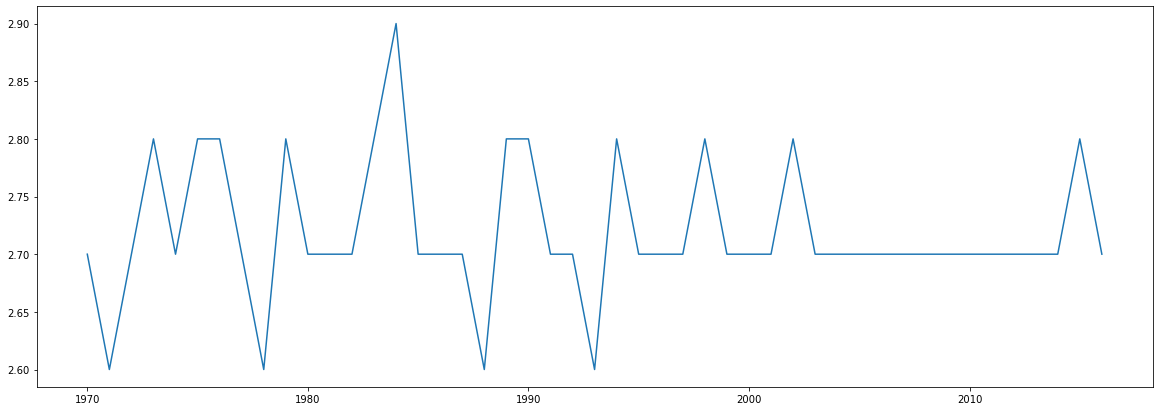

In [121]:
plt.figure(figsize = (20,7))
plt.plot(data_year['year'],avg_ent_year['mode'])

In [120]:
#get all the years where the mode is 2.7 but the next value is not 2.7 - this will be our basis to group the time periods
#given that some of the larger variances in the earlier years might be due to the low amount of data, we group those further. 70-77
avg_ent_year[(avg_ent_year['mode'] == 2.7) & (avg_ent_year['mode'].shift(-1) != 2.7)]['year']

0     1970
2     1972
4     1974
7     1977
12    1982
17    1987
22    1992
27    1997
31    2001
44    2014
46    2016
Name: year, dtype: int64

In [30]:
### some more plots

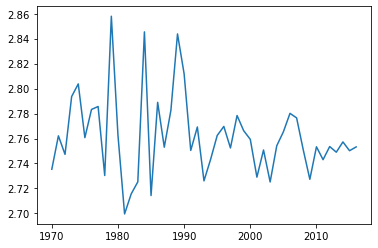

In [80]:
plt.plot(data_year['year'],data_year['absolute_entropy']) # this plot is the entropy of vocabulary per year because all the lyrics are merged #old studff

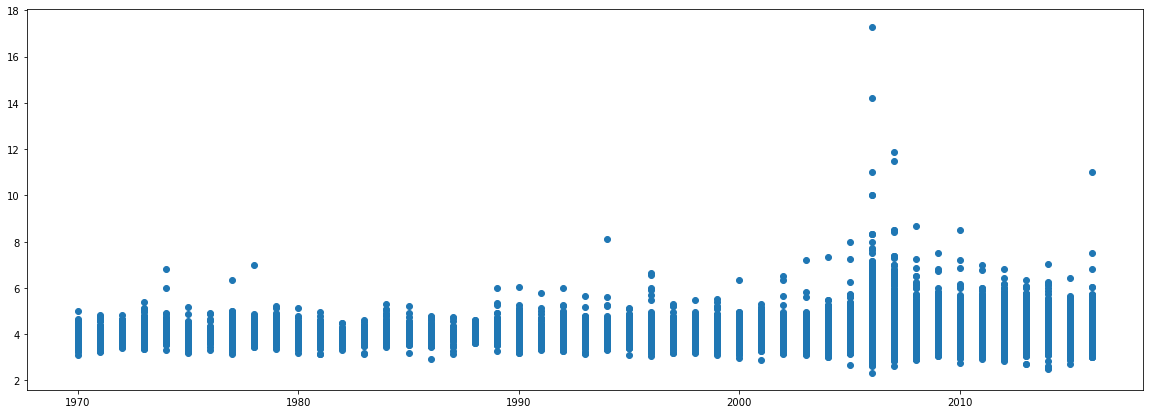

In [86]:
plt.figure(figsize = (20,7))
plt.scatter(data['year'], data['prop_unknown_words'])

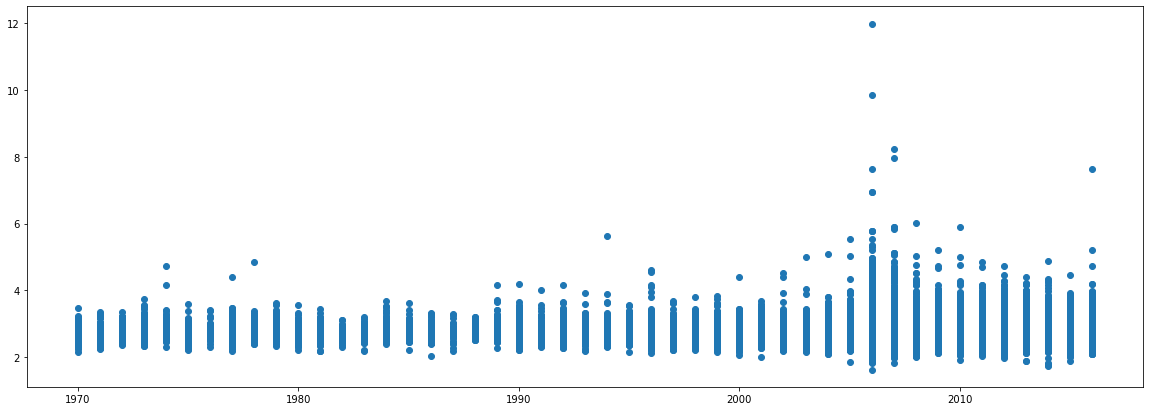

In [87]:
plt.figure(figsize = (20,7))
plt.scatter(data['year'], data['absolute_entropy'])

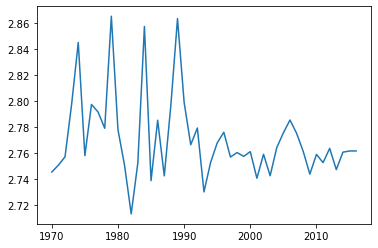

In [31]:
plt.plot(data_avg['year'], data_avg['average_ent'])

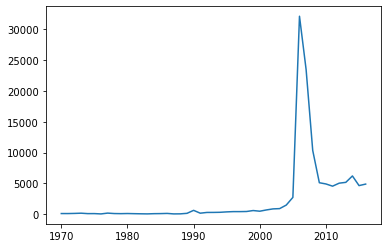

In [32]:
plt.plot(data_avg['year'], data_avg['n_songs'])

In [46]:
#let's calculate the change between modes over time
avg_ent_year['change_mode'] = avg_ent_year['mode'].diff()
#let's calculate the change between averages over time
avg_ent_year['change_average'] = avg_ent_year['average_ent'].diff()

In [112]:
avg_ent_year['change_average_5'] = avg_ent_year['average_ent'].diff(periods = 5)

In [50]:
avg_ent_year.head()

,year,n_songs,average_ent,mode,change_mode,change_average
0,1970,101,2.745402,2.7,NaN,NaN
1,1971,99,2.750701,2.6,-0.1,0.005299
2,1972,122,2.757130,2.7,0.1,0.006429
3,1973,158,2.797792,2.8,0.1,0.040663
4,1974,89,2.845284,2.7,-0.1,0.047492


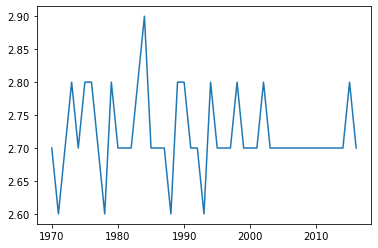

In [114]:
#plotting the change between mode values over time

plt.plot(avg_ent_year['year'], avg_ent_year['mode'])

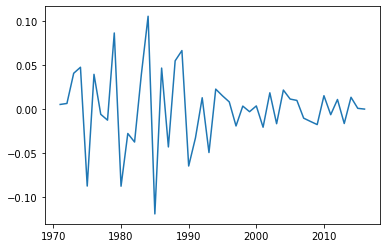

In [48]:
plt.plot(avg_ent_year['year'], avg_ent_year['change_average'])

In [ ]:
#-------LET'S SPLIT THE SEXES--------------------------

In [5]:
fem = data[data['gender'] == 'F']
male = data[data['gender'] == 'M']

In [6]:
ns = []
avgs = []
years = []
modes = []

for i in fem.year.unique():
    year = i
    sumOfNumbers = sum(fem[fem['year'] == i]['absolute_entropy'])
    n = len(fem[fem['year'] == i])
    avg = sumOfNumbers / n
    mode = fem[fem['year'] == i]['rounded_ent'].mode()[0]
  
    
    ns.append(n)
    avgs.append(avg)
    years.append(year)
    modes.append(mode)

    
result = {
'year':pd.Series(years),
'n_songs':pd.Series(ns),
'average_ent':pd.Series(avgs),
'mode':pd.Series(modes)
}
    
fem_sum = pd.DataFrame(result)


In [7]:
ns = []
avgs = []
years = []
modes = []

for i in male.year.unique():
    year = i
    sumOfNumbers = sum(male[male['year'] == i]['absolute_entropy'])
    n = len(male[male['year'] == i])
    avg = sumOfNumbers / n
    mode = male[male['year'] == i]['rounded_ent'].mode()[0]
  
    
    ns.append(n)
    avgs.append(avg)
    years.append(year)
    modes.append(mode)

    
result = {
'year':pd.Series(years),
'n_songs':pd.Series(ns),
'average_ent':pd.Series(avgs),
'mode':pd.Series(modes)
}
    
male_sum = pd.DataFrame(result)


In [8]:
#let's calculate the change between modes over time
fem_sum['change_mode'] = fem_sum['mode'].diff()
#let's calculate the change between averages over time
fem_sum['change_average'] = fem_sum['average_ent'].diff()


#let's calculate the change between modes over time
male_sum['change_mode'] = male_sum['mode'].diff()
#let's calculate the change between averages over time
male_sum['change_average'] = male_sum['average_ent'].diff()

In [81]:
fem_sum.head()

,year,n_songs,average_ent,mode,change_mode,change_average
0,1970,13,2.808608,2.9,NaN,NaN
1,1971,21,2.800999,2.7,-0.2,-0.007608
2,1972,38,2.740950,2.7,0.0,-0.060049
3,1973,34,2.810167,2.8,0.1,0.069217
4,1974,1,2.729019,2.7,-0.1,-0.081148


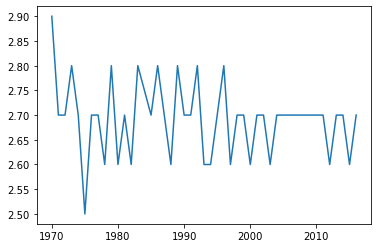

In [109]:
plt.plot(fem_sum['year'],fem_sum['mode'])

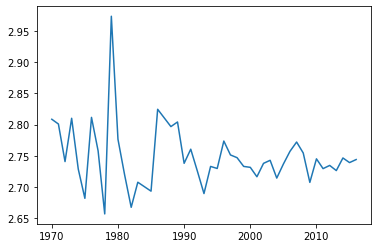

In [9]:
plt.plot(fem_sum['year'],fem_sum['average_ent'])

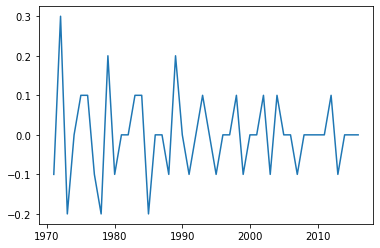

In [105]:
plt.plot(male_sum['year'],male_sum['change_mode'])

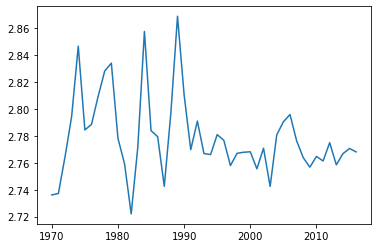

In [11]:
plt.plot(male_sum['year'],male_sum['average_ent'])

In [ ]:
years = df['year'].unique()

# Draw Plot
fig, axes = plt.subplots(1, 2, figsize=(20,7), dpi= 80)
sns.boxplot(x='year', y='value', data=df, ax=axes[0])